## Импорт
библиотек и датасета из базы.

In [1]:
import numpy as np
import pandas as pd
import math as m

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('final_task.csv')
display(df)
display(df.info())
display(pd.DataFrame(df.city.value_counts()))
display(df[df.city == 'Novokuznetsk'])

,flight_id,date,duration,ac_code,ac_model,ac_range,arrival_airport,city,flight_no,total_amount
0,136119,2017-01-03,1.683333,733,Boeing 737-300,4200,SVO,Moscow,PG0252,1653000.0
1,136120,2017-02-24,1.650000,733,Boeing 737-300,4200,SVO,Moscow,PG0252,1605400.0
2,136122,2017-01-08,1.666667,733,Boeing 737-300,4200,SVO,Moscow,PG0252,1431000.0
3,136130,2017-02-13,1.650000,733,Boeing 737-300,4200,SVO,Moscow,PG0252,1556600.0
4,136131,2017-01-28,1.650000,733,Boeing 737-300,4200,SVO,Moscow,PG0252,1812800.0
...,...,...,...,...,...,...,...,...,...,...
188,136540,2017-01-17,5.116667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
189,136533,2016-12-13,5.050000,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
190,136564,2016-12-27,5.083333,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
191,136546,2017-01-03,5.033333,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        193 non-null    int64  
 1   date             193 non-null    object 
 2   duration         193 non-null    float64
 3   ac_code          193 non-null    object 
 4   ac_model         193 non-null    object 
 5   ac_range         193 non-null    int64  
 6   arrival_airport  193 non-null    object 
 7   city             193 non-null    object 
 8   flight_no        193 non-null    object 
 9   total_amount     180 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 15.2+ KB


None

,city
Belgorod,90
Moscow,90
Novokuznetsk,13


,flight_id,date,duration,ac_code,ac_model,ac_range,arrival_airport,city,flight_no,total_amount
180,136518,2016-12-20,5.066667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
181,136534,2016-12-06,5.066667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
182,136523,2017-01-10,5.200000,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
183,136513,2017-02-28,5.166667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
184,136514,2017-02-07,4.983333,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
185,136560,2017-01-24,5.083333,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
186,136544,2017-01-31,5.066667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
187,136511,2017-02-21,5.166667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
188,136540,2017-01-17,5.116667,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN
189,136533,2016-12-13,5.050000,733,Boeing 737-300,4200,NOZ,Novokuznetsk,PG0194,NaN


## Очистка и дополнение

Беглый взгляд показывает, что у нас проблема с Новокузнецком. Нет данных о доходе рейса.

За кадром я проверил запрос не только через сумму по Ticket_Flights, но и через сумму по Booking, там тоже пусто.
Исходя из этого анализировать по Новокузнецку нам нечего.

Фильтрую и продолжаю.

In [3]:
df = df[df.city != 'Novokuznetsk']

In [4]:
print('flight_no:', df.flight_no.unique())
print('city:', df.city.unique())
print('ac_model:', df.ac_model.unique())

flight_no: ['PG0252' 'PG0480']
city: ['Moscow' 'Belgorod']
ac_model: ['Boeing 737-300' 'Sukhoi Superjet-100']


Итого у нас осталось два города, два рейса, два самолёта.

Можно дропнуть столбцы содержащие модель самолёта (оставляю код), город (оставляю рейс), идентификатор полёта (не нужен в анализе), да в общем-то и код аэропорта.

In [5]:
df.drop('ac_model,arrival_airport,city'.split(','), axis=1, inplace=True)

In [6]:
df

,flight_id,date,duration,ac_code,ac_range,flight_no,total_amount
0,136119,2017-01-03,1.683333,733,4200,PG0252,1653000.0
1,136120,2017-02-24,1.650000,733,4200,PG0252,1605400.0
2,136122,2017-01-08,1.666667,733,4200,PG0252,1431000.0
3,136130,2017-02-13,1.650000,733,4200,PG0252,1556600.0
4,136131,2017-01-28,1.650000,733,4200,PG0252,1812800.0
...,...,...,...,...,...,...,...
175,136943,2016-12-05,0.833333,SU9,3000,PG0480,733800.0
176,136951,2017-02-02,0.816667,SU9,3000,PG0480,720600.0
177,136953,2017-02-27,0.833333,SU9,3000,PG0480,765300.0
178,136956,2017-02-04,0.833333,SU9,3000,PG0480,746400.0


In [7]:
df.date = pd.to_datetime(df.date)
df.sort_values(by='date').reset_index().drop('index', axis=1)

,flight_id,date,duration,ac_code,ac_range,flight_no,total_amount
0,136698,2016-12-01,0.816667,SU9,3000,PG0480,746400.0
1,136187,2016-12-01,1.666667,733,4200,PG0252,1873800.0
2,136774,2016-12-02,0.833333,SU9,3000,PG0480,740100.0
3,136474,2016-12-02,1.633333,733,4200,PG0252,1886000.0
4,136391,2016-12-03,1.666667,733,4200,PG0252,1556600.0
...,...,...,...,...,...,...,...
175,136351,2017-02-26,1.666667,733,4200,PG0252,1555400.0
176,136953,2017-02-27,0.833333,SU9,3000,PG0480,765300.0
177,136266,2017-02-27,1.666667,733,4200,PG0252,1566400.0
178,136844,2017-02-28,0.833333,SU9,3000,PG0480,575100.0


### Теперь нужно внести данные расходов по каждому рейсу:
* Расход топлива исходя из самолёта и цен на топливо за зиму 2017 (среднее);
* Зарплаты бортпроводников исходя из их количества на рейсе (тип самолёта и дальность);
* Зарплаты командира и второго пилота исходя из типа самолёта и дальности.

Естественно это будут некоторые допущения.
Более сложные данные я искать не стал.

### Начну с расхода

Часовой расход Boeing 737-300 в среднем по источникам составляет 2500 кг/ч.

Часовой расход ГСС Superjet 100 в среднем по источникам, включая разборки между пилотами о том, как правильно считать расход, на викисайте посвящённом лично суперджету, можно принять за 1700 кг/ч. Копать дальше - страшно.

In [8]:
df['fuel_cons'] = np.nan

df.loc[df[df.ac_code == '733'].index.tolist(), 'fuel_cons'] = 2500
df.loc[df[df.ac_code == 'SU9'].index.tolist(), 'fuel_cons'] = 1700

Нашёл стоимость заправки в Анапе за зиму 2017. Ввожу, перевожу в цену за килограмм и собираю из длительности, расхода и стоимости столбец с потраченными на топливо деньгами.

In [9]:
df['fuel_price'] = np.nan

df.loc[df[df.date.dt.month == 12].index.tolist(), 'fuel_price'] = 38.867
df.loc[df[df.date.dt.month == 1].index.tolist(), 'fuel_price'] = 41.435
df.loc[df[df.date.dt.month == 2].index.tolist(), 'fuel_price'] = 39.553

df['fuel_spent'] = df.duration * df.fuel_cons * df.fuel_price

### Далее бортпроводники
За 2017 год средняя зарплата БП - 60000. Данных по классам не нашёл, поэтому считаю, что какие-то предположения о зарплате в разных классах мне строить не из чего.

Есть данные по количеству БП на суперджете - 2. В боинге 4 аварийных двери, соответственно количество БП не может быть меньше четырёх. Глядя на длительность полёта маловероятно, что их больше.

In [10]:
df['fa_count'] = np.nan

df.loc[df[df.ac_code == '733'].index.tolist(), 'fa_count'] = 4
df.loc[df[df.ac_code == 'SU9'].index.tolist(), 'fa_count'] = 2

### Командир и второй пилот
С ними та же история. Нашел документ, в котором указаны средние зарплаты, но никаких данных о классах воздушных судов.

КВС - 345000, ВП - 200000

In [11]:
df['fl_sal_fa'] = np.nan
df['fl_sal_acc'] = np.nan
df['fl_sal_sp'] = np.nan

for month in df.date.dt.month.unique():
    df.loc[df[df.date.dt.month == month].index.tolist(), 'fl_sal_fa'] = 60000 / len(df[df.date.dt.month == month])
    df.loc[df[df.date.dt.month == month].index.tolist(), 'fl_sal_acc'] = 345000 / len(df[df.date.dt.month == month])
    df.loc[df[df.date.dt.month == month].index.tolist(), 'fl_sal_sp'] = 200000 / len(df[df.date.dt.month == month])

In [12]:
df['sal_spent'] = df.fa_count * df.fl_sal_fa + df.fl_sal_acc + df.fl_sal_sp

Теперь суммирую общие расходы, нахожу прибыль и процент прибыли.

In [13]:
df['spent'] = round(df.sal_spent + df.fuel_spent)

df = df.loc[:,'flight_id,date,flight_no,total_amount,spent'.split(',')]
df.columns = 'fid,date,flight,income,spent'.split(',')

df['profit'] = round(df.income - df.spent)
df['profit_perc'] = round((df.profit / df.income) * 100, 2)

In [14]:
# Любимая мной функция для сличения стат параметров по категории столбца
def corrcol(df, col1, col2):
    # достаём качества из столбца
    names = pd.DataFrame(df[col1].value_counts()).index.tolist()
    # создаем буферный список
    predata = []
    for name in names:  # перелистываем качества
        # создаём список значений col2 по качеству из основного датафрейма
        name = pd.DataFrame(df[col2][df[col1] == name])[col2].tolist()
        # аппендим список значений в буферный список и получаем двухуровневый список
        predata.append(name)
    # транспонируем
    col = pd.DataFrame(predata).T
    # переименовываем столбцы
    col.columns = names
    return col  # возвращаем датафрейм

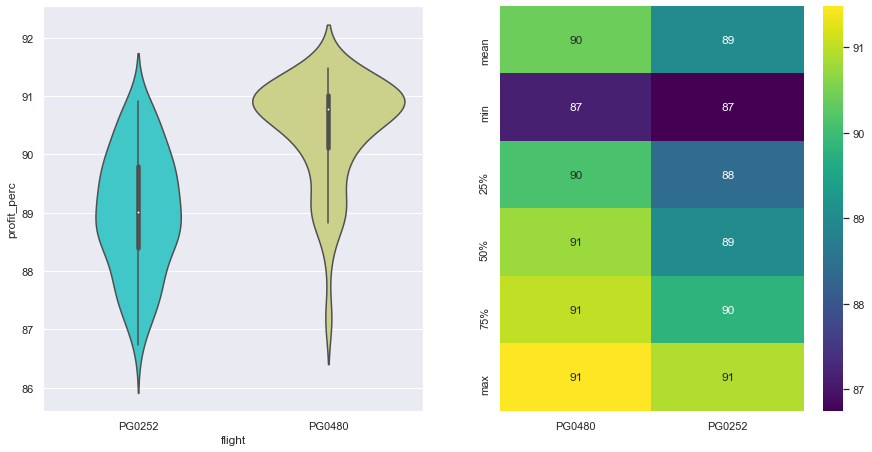

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
plt.subplots_adjust(top=2)

sns.violinplot(x='flight', y='profit_perc', data=df, palette='rainbow', ax = ax[0])
sns.heatmap(corrcol(df, 'flight', 'profit_perc').describe().drop(['count', 'std']), annot=True, cmap="viridis", ax=ax[1])

В хитмапе пришлось дропнуть count (так как конкретно здесь бесполезный параметр) и std (чтоб сработали цвета).

Ниже то же самое в числах.

In [16]:
corrcol(df, 'flight', 'profit_perc').describe()

,PG0480,PG0252
count,90.000000,90.000000
mean,90.423000,89.013667
std,0.917869,1.017925
min,87.150000,86.740000
25%,90.112500,88.397500
50%,90.775000,89.010000
75%,91.025000,89.807500
max,91.480000,90.910000


В целом не очень показательно, особенно с учётом того, что у нас два рейса и мы не можем сказать "к чёрту, в Москву больше не летаем зимой."

Да, на процентик в среднем выгоднее летать в Белгород. Но на мой взгляд на вывод это не тянет. Тем более, что были сильные (на мой взгляд) допущения при введении зарплат.

Попробую сделать распределение процентной прибыли по датам. Интересно, что увижу.

In [17]:
pg0252 = df[df.flight == 'PG0252']
pg0480 = df[df.flight == 'PG0480']

[(75.0, 100.0)]

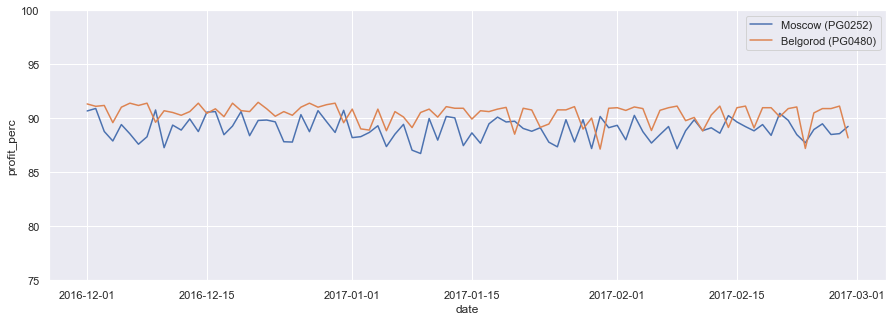

In [18]:
fig1, ax1 = plt.subplots(figsize=(15, 2))
plt.subplots_adjust(top=2)

sns.lineplot(pg0252.date, pg0252.profit_perc, label='Moscow (PG0252)', ax=ax1)
sns.lineplot(pg0480.date, pg0480.profit_perc, label='Belgorod (PG0480)', ax=ax1)
ax1.set(ylim=(75,100))

Иии... снова ничего захватывающего.

То есть я действительно не вижу особой разницы ни между двумя рейсами, ни какой-либо динамики внутри рейсов с течением времени.

Есть что-то отдалённо похожее на небольшой провал в начале января. Но это разница где-то в процент при прибыли около 90%.

Возможно, у меня где-то закралась ошибка.

Гляну самые малоприбыльные 5% рейсов по обоим направлениям. 

In [27]:
display(pg0252.loc[pg0252[pg0252.profit_perc <= pg0252.profit_perc.quantile(0.05)]
           .index.tolist(), ['fid', 'date', 'flight', 'profit_perc']])
display(pg0480.loc[pg0480[pg0480.profit_perc <= pg0480.profit_perc.quantile(0.05)]
           .index.tolist(), ['fid', 'date', 'flight', 'profit_perc']])

,fid,date,flight,profit_perc
2,136122,2017-01-08,PG0252,87.05
14,136178,2017-01-29,PG0252,87.20
28,136250,2017-02-08,PG0252,87.18
56,136352,2016-12-10,PG0252,87.28
81,136464,2017-01-09,PG0252,86.74


,fid,date,flight,profit_perc
102,136642,2017-01-30,PG0480,87.15
144,136807,2017-02-23,PG0480,87.21
152,136844,2017-02-28,PG0480,88.19
164,136887,2017-01-20,PG0480,88.53
170,136922,2017-02-11,PG0480,88.83


В целом мой вывод таков, что с прибылью всё очень неплохо, если самые низкие прибыли у нас 87% от доходов.